# **Principal Component Analysis (PCA) auf 2 Dimensionen des Iris Datensatzes**

Der Datensatz besteht aus je 50 Proben von jeder der drei Schwertlilienarten (Iris setosa, Iris virginica und Iris versicolor). Bei jeder der Proben wurden vier Merkmale gemessen: Die Länge und Breite von Kelchblatt und Kronblatt in Zentimetern. Anhand dieser Merkmale soll die Lilienart bestimmt werden.

In diesem Notebook arbeiten wir nur mit 2 Features/Dimensionen des Iris Datensatzes.

## Vorbereitung

### **Pakete laden**

In [1]:
# Benötigte Pakete Laden
from sklearn import datasets # Datensaetze von sklearn importieren

import numpy as np  # Arrays, Matrizen, mathematische Funktionen
import pandas as pd  # DataFrames

import matplotlib.pyplot as plt  # Grundlegende Plots, Diagramme, Grafiken.
import seaborn as sns  # Statistische Visualisierung: Ansprechende & komplexe Plots (baut auf matplotlib auf).

from sklearn.preprocessing import StandardScaler    # Standardisiert Features (Mittelwert=0, Varianz=1) für vergleichbare Skalen

### **Daten laden**

Die Daten sind abrufbar über sklearn. Wir laden nur 2 Features/Dimensionen

In [38]:
iris = datasets.load_iris()

X = iris.data[:, :2]    # Die Daten laden -- Nur zwei Features!
y = iris.target         # Die Klassen laden
X_names = iris.feature_names[:2]            # Die Feature-Namen laden -- auch nur zwei
y_names = np.array(iris.target_names)[y]    # Die Klassennamen laden

#print(iris.DESCR); # Gibt die vollständige Beschreibung des Datensatzes aus

### **Daten explorieren**

Der erste Schritt ist für gewöhnlich sich einen ersten Eindruck zu verschaffen.

#### Daten und Kennzahlen ansehen

In [40]:
# Welche Form haben die Daten?
print("Shape of X:", X.shape, "  mit: ", X_names)
print("Shape of y:", y.shape)
print("Shape of y_names:", y_names.shape)

Shape of X: (150, 2)   mit:  ['sepal length (cm)', 'sepal width (cm)']
Shape of y: (150,)
Shape of y_names: (150,)


Der Datensatz hat 150 Einträge in 2 Variablen. Der Target Vektor der Klassen hat auch 150 Einträge.

In [41]:
# Ein DataFrame aus den Daten erstellen für eine schönere Ausgabe
X_part = pd.DataFrame(X, columns=X_names)
y_part = pd.Series(y_names, name="target")
iris_df = pd.concat([X_part, y_part], axis=1)

print(iris_df.head(n=12).to_markdown(floatfmt=".2f"))

|    |   sepal length (cm) |   sepal width (cm) | target   |
|---:|--------------------:|-------------------:|:---------|
|  0 |                5.10 |               3.50 | setosa   |
|  1 |                4.90 |               3.00 | setosa   |
|  2 |                4.70 |               3.20 | setosa   |
|  3 |                4.60 |               3.10 | setosa   |
|  4 |                5.00 |               3.60 | setosa   |
|  5 |                5.40 |               3.90 | setosa   |
|  6 |                4.60 |               3.40 | setosa   |
|  7 |                5.00 |               3.40 | setosa   |
|  8 |                4.40 |               2.90 | setosa   |
|  9 |                4.90 |               3.10 | setosa   |
| 10 |                5.40 |               3.70 | setosa   |
| 11 |                4.80 |               3.40 | setosa   |


In [42]:
# Beschreibung und statistische Übersicht der Kennzahlen der Daten ansehen
print("\nKennzahlen der Daten:")

print(iris_df.describe().to_markdown(floatfmt=".3f"))



Kennzahlen der Daten:
|       |   sepal length (cm) |   sepal width (cm) |
|:------|--------------------:|-------------------:|
| count |             150.000 |            150.000 |
| mean  |               5.843 |              3.057 |
| std   |               0.828 |              0.436 |
| min   |               4.300 |              2.000 |
| 25%   |               5.100 |              2.800 |
| 50%   |               5.800 |              3.000 |
| 75%   |               6.400 |              3.300 |
| max   |               7.900 |              4.400 |


#### Daten plotten

Da die Daten jetzt nur zwei Dimensionen haben, können wir sie einfach direkt plotten.

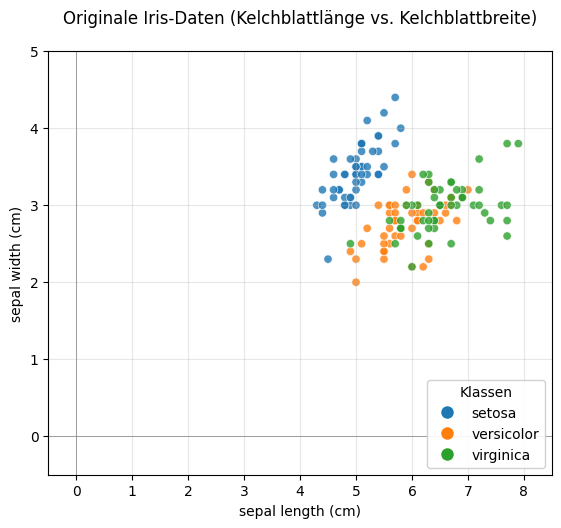

In [9]:
fig_size_x = 6.5
fig_size_y = 5.5

# Farben definieren, die durchgängig verwendet werden:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(fig_size_x, fig_size_y))
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=[custom_colors[i] for i in y],  # Direkte Farbzuweisung
                     alpha=0.8,
                     edgecolors='w',
                     linewidths=0.5)

# Koordinatenachsen durch Ursprung (0,0) in grau
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)


# Legende manuell erstellen und rechts unten positionieren
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                          markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
plt.legend(handles=legend_elements,
           title="Klassen",
           loc='lower right',  # Position rechts unten
           bbox_to_anchor=(1.0, 0.0),  # Feinjustierung der Position
           framealpha=0.9)  # Leicht transparenter Hintergrund

plt.title('Originale Iris-Daten (Kelchblattlänge vs. Kelchblattbreite)', pad=20)
plt.xlabel(X_names[0])
plt.ylabel(X_names[1])
plt.xlim(-0.5, 8.5)
plt.ylim(-0.5, 5)
plt.grid(alpha=0.3)
plt.show()

#### Boxplots

Der Boxplot gibt eine anschauliche Darstellung der Kennzahlen einer Verteilung. Das (hier farbige) Kästchen zeigt die Quartile, der mittlere Strich ist der Median. Die Begrenzungen zeigen die größten, bzw. kleinsten Beobachtungen - ohne die Ausreisser, diese sind als Kreise eingezeichnet.

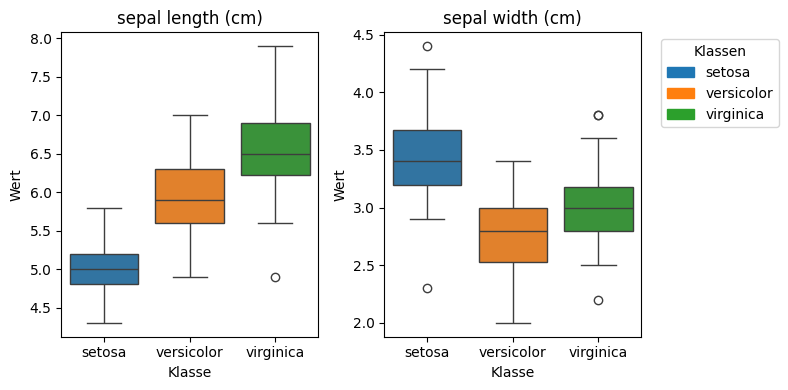

In [47]:
# Farben definieren, die durchgängig verwendet werden:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot erstellen
plt.figure(figsize=(8, 4))

# Für jedes Feature einen Subplot erstellen
for i, feature in enumerate(X_names, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='target', y=feature, data=iris_df,
                hue='target',
                palette=custom_colors,  # Hier werden die custom_colors verwendet
                dodge=False,
                legend=False)  # Legende ausschalten (vermeidet Wiederholungen)

    plt.title(f'{feature}', fontsize=12)
    plt.xlabel('Klasse', fontsize=10)
    plt.ylabel('Wert', fontsize=10)

# Gemeinsame Legende einmalig hinzufügen
handles = [plt.Rectangle((0,0), 1, 1, color=custom_colors[i], label=iris.target_names[i])
           for i in range(3)]
plt.legend(handles=handles, title='Klassen', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Pairplots

Der Pairplot visualisiert paarweise Beziehungen und Verteilungen aller Variablen in einem Datensatz.

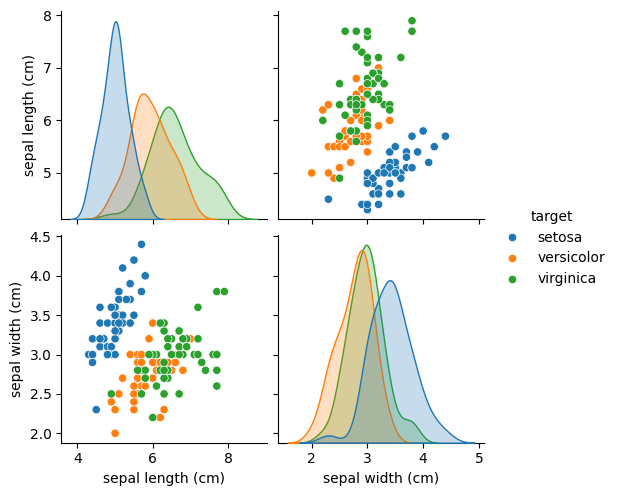

In [48]:
sns.pairplot(iris_df, hue='target')
plt.show()

## **Principal Component Analysis durchführen**

### **Schritt 1: Daten zentrieren und standardisieren**


Bevor wir die Hauptkomponentenanalyse durchführen, zentrieren und standardisieren wir die Daten. Dabei werden alle Veriablen so transformiert, dass sie einen Mittelwert von 0 und eine Varianz von 1 haben.

Die Zentrierung ist wichtig für die Aussagekraft der PCA. Ohne Zentrierung würde die erste Hauptkomponente auf die Mitte der Daten zeigen.

Die standardisierung wird gemacht, damit alle Variablen gleich gewichtet in die Analyse eingehen.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled).head(n=20).to_markdown(floatfmt=".3f"))

|    |      0 |      1 |      2 |      3 |
|---:|-------:|-------:|-------:|-------:|
|  0 | -0.901 |  1.019 | -1.340 | -1.315 |
|  1 | -1.143 | -0.132 | -1.340 | -1.315 |
|  2 | -1.385 |  0.328 | -1.397 | -1.315 |
|  3 | -1.507 |  0.098 | -1.283 | -1.315 |
|  4 | -1.022 |  1.249 | -1.340 | -1.315 |
|  5 | -0.537 |  1.940 | -1.170 | -1.052 |
|  6 | -1.507 |  0.789 | -1.340 | -1.184 |
|  7 | -1.022 |  0.789 | -1.283 | -1.315 |
|  8 | -1.749 | -0.362 | -1.340 | -1.315 |
|  9 | -1.143 |  0.098 | -1.283 | -1.447 |
| 10 | -0.537 |  1.479 | -1.283 | -1.315 |
| 11 | -1.264 |  0.789 | -1.227 | -1.315 |
| 12 | -1.264 | -0.132 | -1.340 | -1.447 |
| 13 | -1.870 | -0.132 | -1.511 | -1.447 |
| 14 | -0.053 |  2.170 | -1.454 | -1.315 |
| 15 | -0.174 |  3.091 | -1.283 | -1.052 |
| 16 | -0.537 |  1.940 | -1.397 | -1.052 |
| 17 | -0.901 |  1.019 | -1.340 | -1.184 |
| 18 | -0.174 |  1.710 | -1.170 | -1.184 |
| 19 | -0.901 |  1.710 | -1.283 | -1.184 |


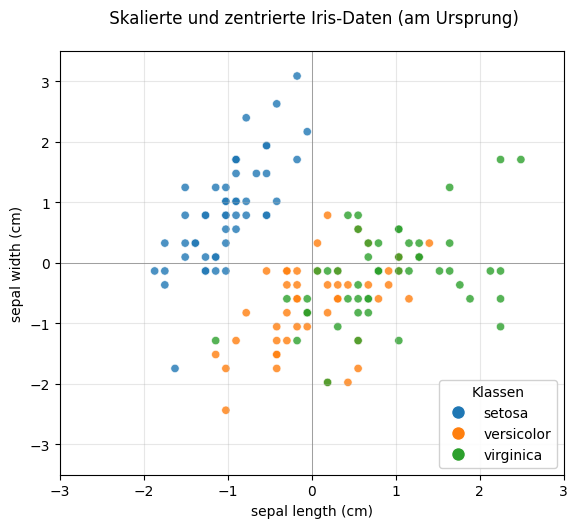

In [11]:
plt.figure(figsize=(fig_size_x, fig_size_y))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=[custom_colors[i] for i in y],  # Direkte Farbzuweisung
                     alpha=0.8,
                     edgecolors='w',
                     linewidths=0.5)

# Koordinatenachsen durch Ursprung (0,0) in grau
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)


# Legende manuell erstellen und rechts unten positionieren
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                          markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
plt.legend(handles=legend_elements,
           title="Klassen",
           loc='lower right',  # Position rechts unten
           bbox_to_anchor=(1.0, 0.0),  # Feinjustierung der Position
           framealpha=0.9)  # Leicht transparenter Hintergrund

plt.title(' Skalierte und zentrierte Iris-Daten (am Ursprung)', pad=20)
plt.xlabel(X_names[0])
plt.ylabel(X_names[1])
plt.xlim(-3, 3)
plt.ylim(-3.5, 3.5)
plt.grid(alpha=0.3)
plt.show()

### **Schritt 2: Kovarianz-Matrix, Eigenwerte und Eigenvektoren**


#### **Kovarianzmatrix**
In diesem Notebook wird die PCA nur auf 2 Dimensionen der Daten durchgeführt um die für die Vorlesung benötigten Plots zu erzeugen

In [12]:
# Daten auf zwei Dim reduzieren
X_scaled_2d = X_scaled[:, :2]

Die Kovarianzmatrix beschreibt die linearen Beziehungen zwischen den einzelnen Variablen. Sie zeigt uns, wie stark zwei Variabeln gemeinsam variieren, also ob sie tendenziell gleichzeitig hohe oder niedrige Werte annehmen.

In der PCA wird die Kovarianzmatrix benötigt, um die Richtungen größter Varianz zu finden.

In [13]:
# Kovarianzmatrix berechnen
cov_matrix = np.cov(X_scaled_2d.T)
print("Kovarianzmatrix-Form:", cov_matrix.shape)

Kovarianzmatrix-Form: (2, 2)


Bei vier Variablen hat die Kovarianzmatrix die Dimension 4×4, wobei die Diagonalelemente die Varianzen der einzelnen Variablen und die Nicht-Diagonalelemente die Kovarianzen zwischen den Variablenpaaren darstellen.

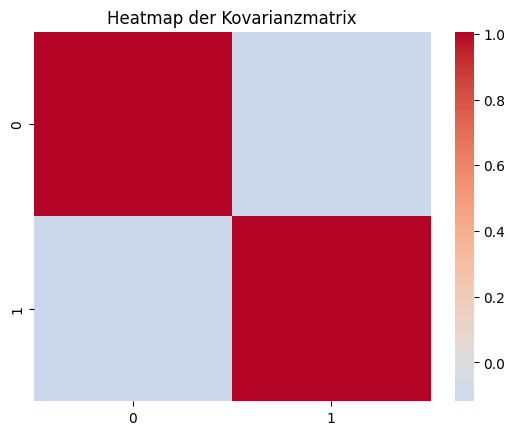

In [14]:
# Kovarianzmatrix plotten
sns.heatmap(cov_matrix, cmap="coolwarm", center=0)
plt.title("Heatmap der Kovarianzmatrix")
plt.show()

### **Schritt 3: Eigenwerte und Eigenvektoren**


Wir berechnen nun die Eigenwerte und Eigenvektoren der Kovarianzmatrix. Die Eigenwerte geben an, wie viel Varianz jeweils durch eine Hauptkomponente erklärt wird. Die Eigenvektoren sind die Richtungen dieser Hauptkomponenten.

Basierend auf der Kovarianzmatrix lassen sich die Eigenwerte und und Eigenvektoren berechnen. Diese helfen dabei, Richtungen mit der größten Varianz in den Daten zu identifizieren.

Die **Eigenvektoren** definieren die Richtungen der neuen Hauptkomponentenachsen im ursprünglichen Merkmalsraum. Jeder Eigenvektor zeigt in die **Richtung der maximalen Varianz** für die entsprechende Hauptkomponente.

Die **Elemente eines Eigenvektors** zeigen an, wie stark jede der ursprünglichen Variablen zu der neuen Hauptkomponente beiträgt. Wenn ein Element eines Eigenvektors groß ist, bedeutet dies, dass die entsprechende ursprüngliche Variable einen starken Einfluss auf diese Hauptkomponente hat.

Die **Eigenwerte** geben die Varianz der Daten entlang der neuen Hauptkomponentenachsen an. Ein großer Eigenwert zeigt an, dass die zugehörige Hauptkomponente eine große Menge an Varianz in den Daten erklärt.

In [15]:
# Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

Wir möchten die Eigenvektoren bzw. Hauptkomponenten identifizieren, die den größten Anteil an Varianz in den Daten erklären. Dazu sortieren wir die Eigenwerte nach absteigender größe.

In [16]:
# Eigenwerte absteigend sortieren
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

num_av_components = len(eigenvectors)

In [17]:
# Loadings-Tabelle erstellen
variable_names = iris.feature_names[:2];  # Namen Ihrer ursprünglichen Variablen

# Berechnungen
explained_variance = eigenvalues
variance_ratio = eigenvalues / eigenvalues.sum() * 100

# Ladungstabelle erstellen
loadings = pd.DataFrame(
    eigenvectors,
    index=variable_names,
    columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])]
)

# Varianz-Informationen als neue Zeilen hinzufügen
loadings.loc['---'] = ['---'] * len(loadings.columns)  # Trennzeile
loadings.loc['Erklärte Varianz'] = explained_variance
loadings.loc['Anteil (%)'] = variance_ratio

### Tabelle als CSV zum Download bereitstellen #####
#from google.colab import files
#
## Als CSV speichern
#loadings.to_csv("WineData-Loadings.csv", index=True)
#
## Download-Link anzeigen
#files.download('WineData-Loadings.csv')

## Loadings Tabelle ausgeben #####
print(loadings.to_markdown(floatfmt=".3f"))

|                   | PC1                 | PC2                 |
|:------------------|:--------------------|:--------------------|
| sepal length (cm) | -0.7071067811865491 | -0.7071067811865458 |
| sepal width (cm)  | 0.7071067811865458  | -0.7071067811865491 |
| ---               | ---                 | ---                 |
| Erklärte Varianz  | 1.1250702524828873  | 0.8883525663090573  |
| Anteil (%)        | 55.878489206650116  | 44.121510793349884  |


In [18]:
print(eigenvectors)
print(type(eigenvectors))

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
<class 'numpy.ndarray'>


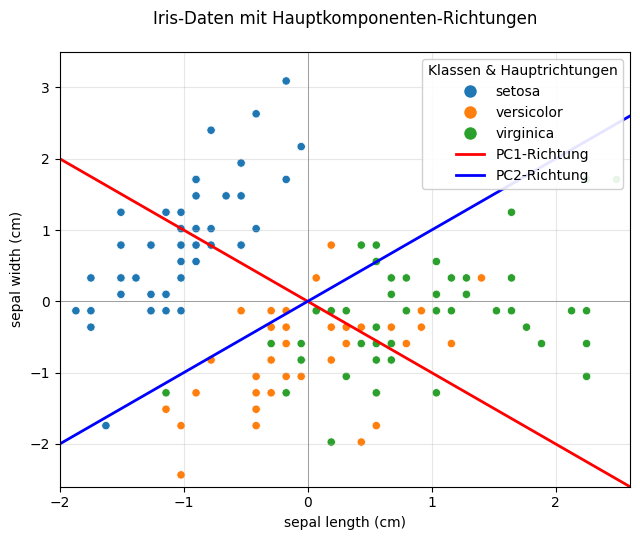

In [19]:
plt.figure(figsize=(fig_size_x, fig_size_y))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=[custom_colors[i] for i in y],
                     alpha=1,
                     edgecolors='w',
                     linewidths=0.5)

# Koordinatenachsen durch Ursprung
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)

# Eigenvektoren als durchgehende Linien
pc_colors = ['red', 'blue']
xlim = plt.xlim()
ylim = plt.ylim()

for i, vec in enumerate(eigenvectors.T[:2]):
    slope = vec[1]/vec[0]
    x_vals = np.array([xlim[0], xlim[1]])
    y_vals = slope * x_vals
    plt.plot(x_vals, y_vals,
             color=pc_colors[i], linewidth=2, alpha=1,
             linestyle='-')

# Legende oben rechts
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                  markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
legend_elements.extend([
    Line2D([0], [0], color='red', lw=2, linestyle='-', label='PC1-Richtung'),
    Line2D([0], [0], color='blue', lw=2, linestyle='-', label='PC2-Richtung')
])

plt.legend(handles=legend_elements,  # Korrigiert: "handles" statt "handles"
           title="Klassen & Hauptrichtungen",
           loc='upper right',  # Oben rechts
           bbox_to_anchor=(1.0, 1.0),  # Ankerpunkt oben rechts
           framealpha=0.9)

plt.title('Iris-Daten mit Hauptkomponenten-Richtungen', pad=20)
plt.xlabel(X_names[0])
plt.ylabel(X_names[1])
plt.xlim(-2, 2.6)
plt.ylim(-2.6, 3.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

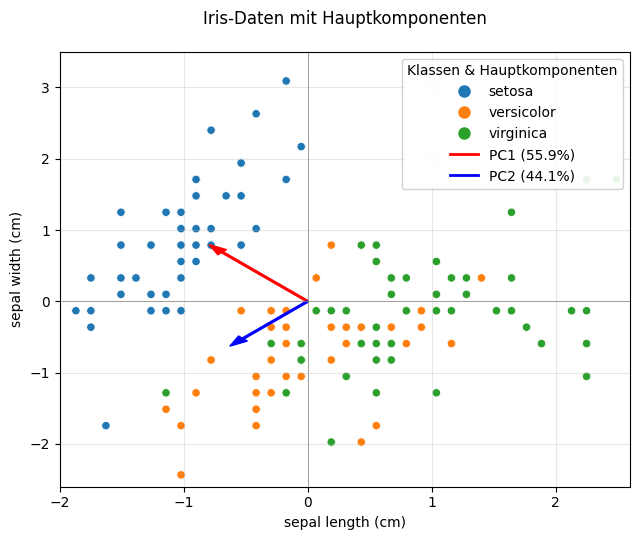

In [20]:
eigenvalues_2d = eigenvalues[:2]

plt.figure(figsize=(fig_size_x, fig_size_y))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=[custom_colors[i] for i in y],
                     alpha=1,
                     edgecolors='w',
                     linewidths=0.5)

# Koordinatenachsen durch Ursprung
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)

# Berechne Varianzanteile in %
total_var = sum(eigenvalues_2d)
var_percent = [val/total_var * 100 for val in eigenvalues_2d]

# Eigenvektoren mit Eigenwert-Skalierung als Pfeile
pc_colors = ['red', 'blue']
origin = np.array([0, 0])  # Ursprungspunkt

for i, (vec, val) in enumerate(zip(eigenvectors.T[:2], eigenvalues_2d)):
    scaled_vec = vec * val  # Skaliere mit Eigenwert
    plt.arrow(origin[0], origin[1],
              scaled_vec[0], scaled_vec[1],
              color=pc_colors[i],
              width=0.02,
              head_width=0.1,
              length_includes_head=True,
              alpha=1)

# Legende mit Varianzprozenten
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                  markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
legend_elements.extend([
    Line2D([0], [0], color='red', lw=2,
           label=f'PC1 ({var_percent[0]:.1f}%)'),
    Line2D([0], [0], color='blue', lw=2,
           label=f'PC2 ({var_percent[1]:.1f}%)')
])

plt.legend(handles=legend_elements,
           title="Klassen & Hauptkomponenten",
           loc='upper right',
           bbox_to_anchor=(1.0, 1.0),
           framealpha=0.9)

plt.title('Iris-Daten mit Hauptkomponenten'.format(var_percent[0], var_percent[1]),
          pad=20)
plt.xlabel(X_names[0])
plt.ylabel(X_names[1])
plt.xlim(-2, 2.6)
plt.ylim(-2.6, 3.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### **Schritt 4: Wahl der Hauptkomponenten**

#### Scree Plot

Ein Scree-Plot zeigt die Eigenwerte in absteigender Reihenfolge. So erkennt man, wie viel Varianz jede Komponente erklärt.

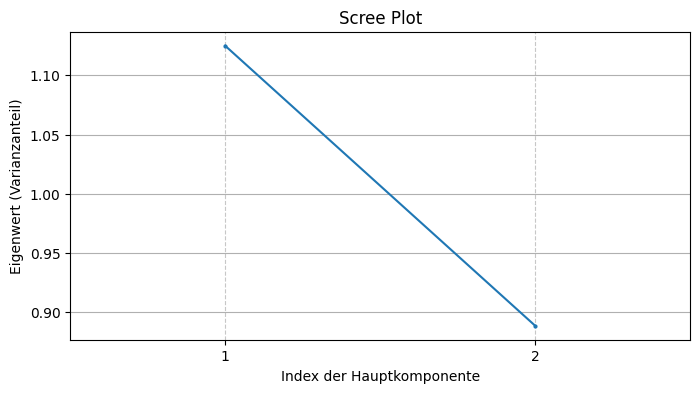

In [21]:
# Schritt 6: Scree-Plot und Auswahl der PCs
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, num_av_components+1), eigenvalues[:num_av_components], 'o-',markersize=2)

# Beschriftungen anpassen
plt.xlabel('Index der Hauptkomponente')
plt.ylabel('Eigenwert (Varianzanteil)')
plt.title('Scree Plot')

# X-Achse konfigurieren
plt.xticks(np.arange(1, num_av_components+1))  # Nur Ticks bei 1-5
plt.xlim(0.5, num_av_components + 0.5)  # Kleiner Rand links/rechts

# Grid nur bei den X-Ticks
plt.grid(True, axis='y')  # Horizontale Gridlines immer
plt.grid(True, axis='x', which='major', linestyle='--', alpha=0.7)  # Nur bei Haupt-Ticks

plt.show()

Wenn die Hauptkomponenten bekannt sind, muss entschieden werden, wieviele davon herangezogen werden sollen um die Daten zu beschreiben. In diesem Schritt findet die eigentliche Dimesionsreduktion statt. Dabei muss berücksichtigt werden, dass mit der Dimensionsreduktion auch immer ein Informationsverlust einhergeht.

Ein zuverlässiges Kriterium ist die kumulierte Varianz. Dabei wird geschaut, wieviele Hauptkomponenten benötigt werden um 90% bzw 95% der Varianz in den Daten zu beschreiben.

#### Kumulierte Varianz

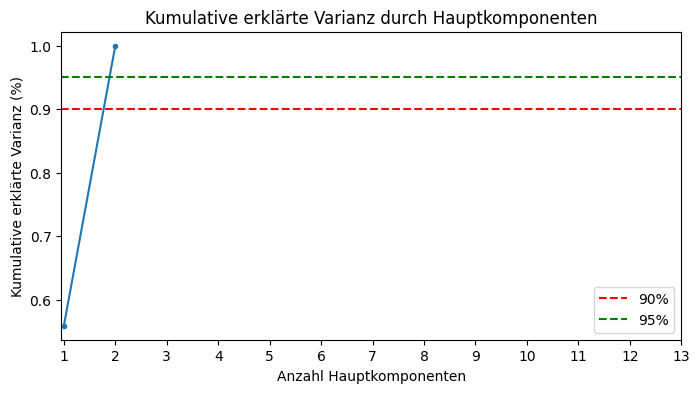

In [22]:
# Kumulierte erklärte Varianz berechnen
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot der kumulierten Varianz
plt.figure(figsize=(8, 4))

plt.plot(np.arange(1, len(cumulative_variance) + 1),
         cumulative_variance,
         linestyle='-',  # Durchgezogene Linie (Standard)
         linewidth=1.5,   # Etwas dickere Linie für bessere Sichtbarkeit
         marker='o',         # Punkte hinzufügen
         markersize=3       # Größe der Punkte
)

plt.axhline(y=0.90, color='r', linestyle='--', label='90%')
plt.axhline(y=0.95, color='g', linestyle='--', label='95%')
plt.xlabel('Anzahl Hauptkomponenten')
plt.xticks(np.arange(1, 14))
plt.ylabel('Kumulative erklärte Varianz (%)')
plt.title('Kumulative erklärte Varianz durch Hauptkomponenten')
plt.legend()
#plt.grid(True)
plt.show()

In [23]:
# Komponentenanzahl für 90 % bzw. 95 % Varianz bestimmen
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Anzahl Komponenten für 90% erklärte Varianz: {n_90}")
print(f"Anzahl Komponenten für 95% erklärte Varianz: {n_95}")

Anzahl Komponenten für 90% erklärte Varianz: 2
Anzahl Komponenten für 95% erklärte Varianz: 2


### **Schritt 5: Projektion der Daten**


Die standardisierten Daten werden nun auf die gewählten Hauptkomponenten projiziert. Dadurch erhalten wir eine Darstellung der Daten in einem neuen Merkmalsraum mit reduzierter Dimensionalität. Mathematisch wird dies durch Matrixmultiplikation mit den ausgewählten Eigenvektoren umgesetzt.

In [24]:
num_components = n_95; # n_90 bei 90% erklaerter Varianz

X_pca = X_scaled_2d.dot(eigenvectors[:, :num_components])
print("Projizierte Datenform:", X_pca.shape)


n_components = X_pca.shape[1]

# in dataframe umwandeln
X_pca_df = pd.DataFrame(
    data = X_pca,
    columns = [f"PC{i+1}" for i in range(n_components)])

# Die ersten 15 Zeilen der projizierten Daten ausgeben
print(X_pca_df.head(15).to_markdown(floatfmt=".3f"))

Projizierte Datenform: (150, 2)
|    |   PC1 |    PC2 |
|---:|------:|-------:|
|  0 | 1.357 | -0.084 |
|  1 | 0.715 |  0.902 |
|  2 | 1.212 |  0.747 |
|  3 | 1.135 |  0.996 |
|  4 | 1.606 | -0.161 |
|  5 | 1.751 | -0.992 |
|  6 | 1.623 |  0.507 |
|  7 | 1.280 |  0.165 |
|  8 | 0.981 |  1.493 |
|  9 | 0.878 |  0.739 |
| 10 | 1.426 | -0.666 |
| 11 | 1.452 |  0.336 |
| 12 | 0.801 |  0.987 |
| 13 | 1.229 |  1.416 |
| 14 | 1.572 | -1.497 |


## Visualisierung der projizierten Daten

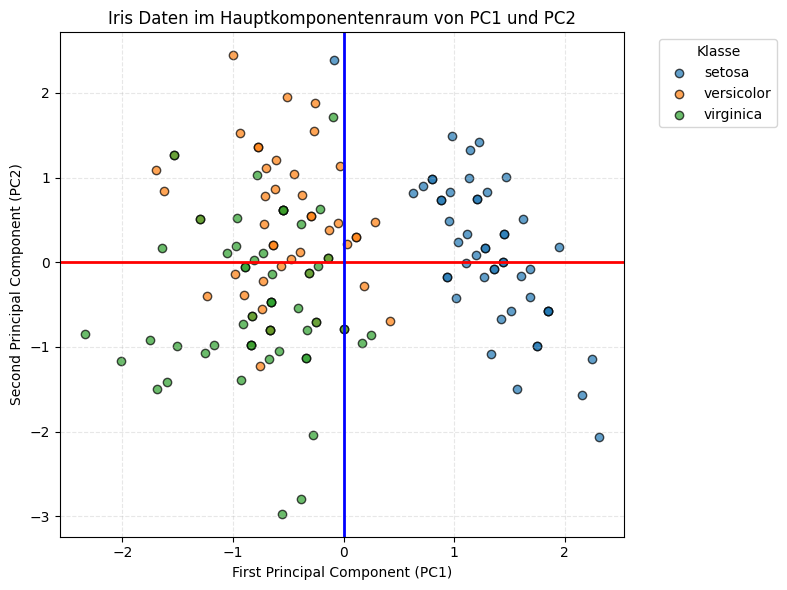

In [26]:
target_names = iris.target_names

# Plot erstellen
plt.figure(figsize=(8, 6))

# Koordinatenachsen durch Ursprung
plt.axhline(y=0, color='red', linestyle='-', linewidth=2, alpha=1)
plt.axvline(x=0, color='blue', linestyle='-', linewidth=2, alpha=1)

# Scatter-Plot mit Farben nach Klasse und Legenden-Labels
for class_id, class_name in enumerate(target_names):
    plt.scatter(
        X_pca[y == class_id, 0],  # PC1 für diese Klasse
        X_pca[y == class_id, 1],  # PC2 für diese Klasse
        label=class_name,
        alpha=0.7,
        edgecolor='k'
    )

# Titel und Achsen
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('Iris Daten im Hauptkomponentenraum von PC1 und PC2')
plt.grid(True, linestyle='--', alpha=0.3)

# Legende statt Colorbar
plt.legend(title="Klasse", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Verhindert Überlappungen
plt.show()